In [1]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print(f"CUDA is available. GPU is ready to use. GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. Using CPU.")


CUDA is available. GPU is ready to use. GPU: NVIDIA GeForce RTX 4050 Laptop GPU


In [2]:
import tensorflow as tf

# Check if TensorFlow can access GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using the GPU")
else:
    print("TensorFlow is not using the GPU")

TensorFlow is using the GPU


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2844698410738992819
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3710910464
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11036232763173463570
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
 xla_global_id: 416903419]

In [4]:
import os

# Set the full path to your dataset
dataset_path = r"C:\Users\rifat\deep learning projects\cifar-10"

# Check if the directory exists
if os.path.exists(dataset_path):
    # List all folders and files in the cifar-10 directory
    folders = os.listdir(dataset_path)
    
    # Print each folder/file in the directory
    for folder in folders:
        print(folder)
else:
    print(f"Directory not found: {dataset_path}")



sampleSubmission.csv
test.7z
train
train.7z
trainLabels.csv


In [5]:
!pip install py7zr


     ---------------------------------------- 67.9/67.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 46.5/46.5 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 357.3/357.3 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 9.6 MB/s eta 0:00:00
     -------------------------------------- 245.0/245.0 kB 7.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import py7zr
import os

# Full path to your 7z file
archive_path = r"C:\Users\rifat\deep learning projects\cifar-10\train.7z"
extract_to = r"C:\Users\rifat\deep learning projects\cifar-10\train"

# Create the output directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the archive
with py7zr.SevenZipFile(archive_path, mode='r') as archive:
    archive.extractall(path=extract_to)

print(f"Files extracted to: {extract_to}")

Files extracted to: C:\Users\rifat\deep learning projects\cifar-10\train


In [7]:
import tensorflow as tf

# List available devices
devices = tf.config.list_physical_devices('GPU')
if devices:
    print(f"TensorFlow is using the GPU: {devices}")
else:
    print("TensorFlow is not using the GPU.")


TensorFlow is using the GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
train_dir = r"C:\Users\rifat\deep learning projects\cifar-10\train\train"
file_count = sum([len(files) for _, _, files in os.walk(train_dir)])

print(f"Total number of training images: {file_count}")


Total number of training images: 50000


In [12]:
import os

train_dir = r"C:\Users\rifat\deep learning projects\cifar-10\train\train"

# Collect all image file paths
filenames = []
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # common image formats
            filenames.append(os.path.join(root, file))

# Print first and last 5 filenames
print(filenames[0:5])
print(filenames[-5:])


['C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\1.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\10.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\100.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\1000.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\10000.png']
['C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\9995.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\9996.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\9997.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\9998.png', 'C:\\Users\\rifat\\deep learning projects\\cifar-10\\train\\train\\9999.png']


In [13]:
labels_df = pd.read_csv(r"C:\Users\rifat\deep learning projects\cifar-10\trainLabels.csv")
labels_df.shape

(50000, 2)

In [14]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

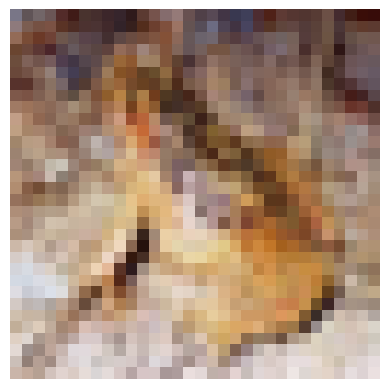

In [16]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('C:/Users/rifat/deep learning projects/cifar-10/train/train/7796.png')

# Convert from BGR (OpenCV default) to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Optional: hide axis
plt.show()

In [17]:
id_list = list(labels_df['id'])

In [18]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [19]:
import numpy as np
from PIL import Image
import os

train_data_folder = 'C:/Users/rifat/deep learning projects/cifar-10/train/train/'
data = []

for id in id_list:
    image = Image.open(train_data_folder + str(id) + '.png')
    data.append(np.array(image))


In [20]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [21]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [26]:
model.compile(
    optimizer='adam',                          # Efficient optimizer
    loss='sparse_categorical_crossentropy',    # Suitable for integer labels
    metrics=['acc']                            # Track accuracy during training
)


In [27]:
model.fit(
    X_train_scaled,       # Your preprocessed training images
    Y_train,              # Corresponding labels (0–9 for CIFAR-10)
    validation_split=0.1, # 10% of training data used for validation
    epochs=10             # Number of times the model sees the full training set
)


Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9739 - acc: 0.2845 - val_loss: 1.8223 - val_acc: 0.3355
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8317 - acc: 0.3405 - val_loss: 1.8109 - val_acc: 0.3400
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7954 - acc: 0.3564 - val_loss: 1.7610 - val_acc: 0.3677
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7820 - acc: 0.3602 - val_loss: 1.7716 - val_acc: 0.3600
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7660 - acc: 0.3695 - val_loss: 1.7770 - val_acc: 0.3640
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7507 - acc: 0.3744 - val_loss: 1.7516 - val_acc: 0.3705
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7370 - acc: 0.3792 - val_loss: 1.7436 - val_acc: 0.3745
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [28]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [29]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [30]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [31]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=2e-5), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [33]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=8)


Epoch 1/10
4500/4500 [==============================] - 645s 140ms/step - loss: 2.1073 - accuracy: 0.2852 - val_loss: 1.0253 - val_accuracy: 0.6603
Epoch 2/10
4500/4500 [==============================] - 627s 139ms/step - loss: 1.7641 - accuracy: 0.3976 - val_loss: 0.8814 - val_accuracy: 0.7125
Epoch 3/10
4500/4500 [==============================] - 1255s 279ms/step - loss: 1.5889 - accuracy: 0.4612 - val_loss: 0.7632 - val_accuracy: 0.7492
Epoch 4/10
4500/4500 [==============================] - 904s 201ms/step - loss: 1.4654 - accuracy: 0.5088 - val_loss: 0.6784 - val_accuracy: 0.7772
Epoch 5/10
4500/4500 [==============================] - 629s 140ms/step - loss: 1.3550 - accuracy: 0.5565 - val_loss: 0.6095 - val_accuracy: 0.8030
Epoch 6/10
4500/4500 [==============================] - 629s 140ms/step - loss: 1.2562 - accuracy: 0.5989 - val_loss: 0.5133 - val_accuracy: 0.8300
Epoch 7/10
4500/4500 [==============================] - 1057s 235ms/step - loss: 1.1879 - accuracy: 0.6221 - va

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 33s 98ms/step - loss: 0.4172 - accuracy: 0.8702
Test Accuracy = 0.870199978351593


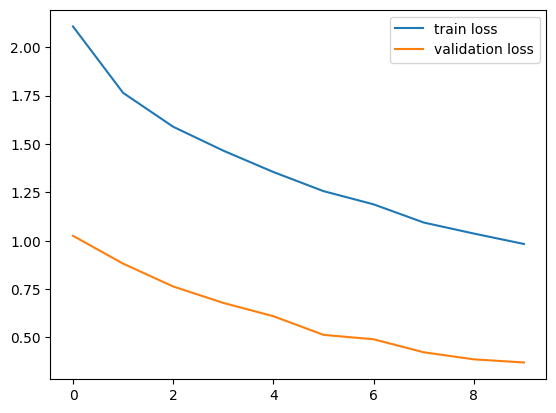

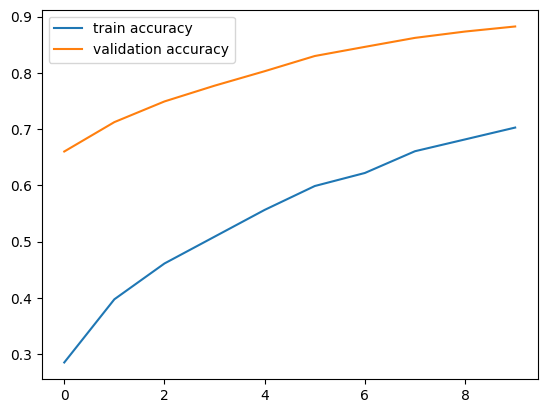

In [36]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 3s 3s/step
Predicted object: cat


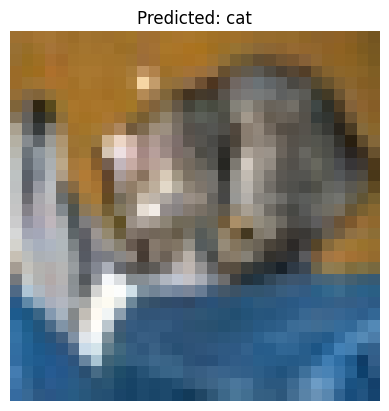

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize images (very important!)
X_test = X_test / 255.0

# Example: Test on the first image
img = X_test[0]

# Model expects batch dimension, so add one dimension
img_batch = np.expand_dims(img, axis=0)

# Predict
pred_prob = model.predict(img_batch)
pred_class = np.argmax(pred_prob)

# CIFAR-10 labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

print("Predicted object:", classes[pred_class])

# Show image
plt.imshow(img)
plt.title(f"Predicted: {classes[pred_class]}")
plt.axis('off')  # Hide axes
plt.show()
